<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Результат-ревью:" data-toc-modified-id="Результат-ревью:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Результат ревью:</a></span><ul class="toc-item"><li><span><a href="#О-чем-проект:" data-toc-modified-id="О-чем-проект:-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>О чем проект:</a></span></li><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Откроем-файл-с-данными-и-изучим-общую-информацию" data-toc-modified-id="Откроем-файл-с-данными-и-изучим-общую-информацию-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Откроем файл с данными и изучим общую информацию</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Корреляционный-анализ" data-toc-modified-id="Корреляционный-анализ-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Корреляционный анализ</a></span></li><li><span><a href="#Обучение-модели-линейной-регрессии" data-toc-modified-id="Обучение-модели-линейной-регрессии-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Обучение модели линейной регрессии</a></span></li><li><span><a href="#Обучение-модели-логистичекой-регрессии" data-toc-modified-id="Обучение-модели-логистичекой-регрессии-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Обучение модели логистичекой регрессии</a></span></li><li><span><a href="#Итоговый-вывод" data-toc-modified-id="Итоговый-вывод-1.9"><span class="toc-item-num">1.9&nbsp;&nbsp;</span>Итоговый вывод</a></span></li></ul></li><li><span><a href="#Результат-ревью:" data-toc-modified-id="Результат-ревью:-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Результат ревью:</a></span></li></ul></div>

##  О чем проект: 
Вы работаете в IT-компании, которая выполняет на заказ проекты по машинному обучению. К вам обратился фермер, владелец молочного хозяйства «Вольный луг». Он хочет купить бурёнок, чтобы расширить поголовье стада коров. Для этого он заключил выгодный контракт с ассоциацией пастбищ «ЭкоФерма».
Условия позволяют фермеру очень тщательно отобрать коров. Он определяет качество молока по строгой методике, и при этом ему нужно выполнять свой план развития молочного хозяйства. Фермер хочет, чтобы каждая бурёнка давала не менее 6000 килограммов молока в год, а надой был вкусным — строго по его критериям, ничуть не хуже. А продавцы и технологи так и норовят приукрасить своих бурёнок!
Поэтому он просит нас модель машинного обучения, которая поможет ему управлять рисками и принимать объективное решение о покупке. «ЭкоФерма» готова предоставить подробные данные о своих коровах. Вам нужно создать две прогнозные модели для отбора бурёнок в поголовье:
* Первая будет прогнозировать возможный удой у коровы (целевой признак Удой);
* Вторая — рассчитывать вероятность получить вкусное молоко от коровы (целевой признак Вкус молока).

С помощью модели нужно отобрать коров по двум критериям:
* Средний удой за год — не менее 6000 килограммов,
* Молоко должно быть вкусным.

**Цель проекта:** 

Создать модель машинного обучения, которая поможет фермеру управлять рисками и принимать объективное решение о покупке коров.

**План работы:**

* Загрузить и проанализировать данные;
* Провести исследовательский анализ данных и визуализировать их;
* Провести корреляционный анализ;
* Обучить модель линейной регрессии;
* Обучить модель логистической регрессии;
* Сделать выводы.


## Загрузка данных

In [1]:
!pip install phik

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import binom, norm
from scipy import stats as st
from scipy.stats import spearmanr
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
import phik

## Откроем файл с данными и изучим общую информацию

In [3]:
data_ferma = pd.read_csv('/datasets/ferma_main.csv', sep = ';',decimal = ',')
pd.set_option('display.max_rows', None)#параметр для выводы всего датафрейма
data_ferma.head(10)

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.073,вкусно,менее_2_лет
5,6,5254,12.7,1806,0.885,РефлешнСоверинг,Холмистое,Соверин,3.13,3.078,вкусно,менее_2_лет
6,7,5910,13.2,1792,0.885,Вис Бик Айдиал,Равнинные,Соверин,3.48,3.077,вкусно,более_2_лет
7,8,6179,14.7,1806,0.930,Вис Бик Айдиал,Равнинные,Айдиал,3.55,3.076,вкусно,более_2_лет
8,9,6783,14.2,1918,0.940,РефлешнСоверинг,Холмистое,Айдиал,3.71,3.077,вкусно,более_2_лет
9,10,5339,13.4,1791,0.895,Вис Бик Айдиал,Холмистое,Соверин,3.13,3.075,вкусно,менее_2_лет


In [4]:
print(*data_ferma.columns, sep = '\n')

id
Удой, кг
ЭКЕ (Энергетическая кормовая единица)
Сырой протеин, г
СПО (Сахаро-протеиновое соотношение)
Порода
Тип пастбища
порода папы_быка
Жирность,%
Белок,%
Вкус молока
Возраст


In [5]:
data_ferma.columns.values

array(['id', 'Удой, кг', 'ЭКЕ (Энергетическая кормовая единица)',
       'Сырой протеин, г', 'СПО (Сахаро-протеиновое соотношение)',
       'Порода', 'Тип пастбища', 'порода папы_быка', 'Жирность,%',
       'Белок,%', 'Вкус молока', 'Возраст'], dtype=object)

In [6]:
data_dad = pd.read_csv('/datasets/ferma_dad.csv', sep = ';',decimal = ',')
pd.set_option('display.max_rows', None)#параметр для выводы всего датафрейма
data_dad.head(10)

,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин
5,6,Барин
6,7,Соловчик
7,8,Геркулес
8,9,Буйный
9,10,Барин


In [7]:
print(*data_dad.columns, sep = '\n')

id
Имя Папы


In [8]:
data_dad.columns.values

array(['id', 'Имя Папы'], dtype=object)

In [9]:
data_cow = pd.read_csv('/datasets/cow_buy_old.csv', sep = ';',decimal = ',')
pd.set_option('display.max_rows', None)#параметр для выводы всего датафрейма
data_cow.head(10)

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%"
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079
8,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079


In [10]:
print(*data_cow.columns, sep = '\n')

Порода
Тип пастбища
порода папы_быка
Имя_папы
Текущая_жирность,%
Текущий_уровень_белок,%


In [11]:
data_cow.columns.values

array(['Порода', 'Тип пастбища', 'порода папы_быка', 'Имя_папы',
       'Текущая_жирность,%', 'Текущий_уровень_белок,%'], dtype=object)

In [12]:
data = data_ferma.merge(data_dad)

**После выгрузки данных видно, что не все названия столбцов приведены к нижнему регистру, а так же есть неточности в значениях данных.Типы данных описаны верно.**

## Предобработка данных

**Рассмотрим файл с данными о стаде фермера на текущий момент**

In [13]:
data_ferma.info()#информация по датафрейму

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     634 non-null    int64  
 1   Удой, кг                               634 non-null    int64  
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    float64
 3   Сырой протеин, г                       634 non-null    int64  
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    float64
 5   Порода                                 634 non-null    object 
 6   Тип пастбища                           634 non-null    object 
 7   порода папы_быка                       634 non-null    object 
 8   Жирность,%                             634 non-null    float64
 9   Белок,%                                634 non-null    float64
 10  Вкус молока                            634 non-null    object 
 11  Возрас

In [14]:
data_ferma.rename(columns = {'Удой, кг':'удой'}, inplace = True )

**Я поменяла название столбца, потому что jupyterhub очень странно реагирует в дальнейшем на первоначальное название стобца.**

In [15]:
data_ferma.isnull().sum().sum()#наличие пропусков

0

In [16]:
data_ferma.duplicated().sum()#наличие дубликатов

5

**Дубликаты есть,в отличие от пропксков, интересно посмотреть, где они**

In [17]:
data_ferma[data_ferma.duplicated()]

,id,удой,ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
629,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
630,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
631,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
632,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
633,627,5970,14.4,1837,0.88,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет


**Наблюдаем наличие дубликатов коров с одинаковым id, значит это одна и та же корова. Избавимся от них.**

In [18]:
data_ferma.drop_duplicates(inplace=True)
data_ferma.duplicated().sum()

0

**Приведем названия столбцов к нижнему регистру**

In [19]:
data_ferma.columns = data_ferma.columns.str.lower()
data_ferma.columns

Index(['id', 'удой', 'эке (энергетическая кормовая единица)',
       'сырой протеин, г', 'спо (сахаро-протеиновое соотношение)', 'порода',
       'тип пастбища', 'порода папы_быка', 'жирность,%', 'белок,%',
       'вкус молока', 'возраст'],
      dtype='object')

In [20]:
data_ferma['порода папы_быка'] = data_ferma['порода папы_быка'].replace('Айдиалл','Айдиал')
data_ferma['порода папы_быка'].sort_values().unique()

array(['Айдиал', 'Соверин'], dtype=object)

In [21]:
data_ferma['тип пастбища'] = data_ferma['тип пастбища'].replace('Равнинные','Равнинное')

In [22]:
print(*data_ferma['тип пастбища'].unique(), sep="\n")

Равнинное
Холмистое


In [23]:
data_ferma.describe()

,id,удой,эке (энергетическая кормовая единица),"сырой протеин, г",спо (сахаро-протеиновое соотношение),"жирность,%","белок,%"
count,629.00000,629.000000,629.000000,629.000000,629.000000,629.000000,629.000000
mean,315.00000,6188.750397,14.543879,1923.364070,0.913116,3.603657,3.075671
std,181.72094,1644.795489,1.306408,182.956251,0.032203,0.168656,0.002549
min,1.00000,5204.000000,10.900000,1660.000000,0.840000,2.990000,3.069000
25%,158.00000,5751.000000,13.500000,1771.000000,0.890000,3.590000,3.074000
50%,315.00000,6133.000000,14.700000,1888.000000,0.930000,3.650000,3.076000
75%,472.00000,6501.000000,15.600000,2062.000000,0.940000,3.720000,3.077000
max,629.00000,45616.000000,16.800000,2349.000000,0.960000,3.750000,3.085000


In [24]:
data_ferma.loc[data_ferma['удой'] > 8000]

,id,удой,эке (энергетическая кормовая единица),"сырой протеин, г",спо (сахаро-протеиновое соотношение),порода,тип пастбища,порода папы_быка,"жирность,%","белок,%",вкус молока,возраст
16,17,45616,11.5,1675,0.93,Вис Бик Айдиал,Холмистое,Айдиал,3.22,3.076,вкусно,более_2_лет


**Исследование показало наличие выбросов в значениях удоев.Скорее всего данные просто были неверно введены. Исправим на величину значения, встречающуюся в 50% случаях.**

In [25]:
data_ferma['удой'] = data_ferma['удой'].replace(45616,6133)

In [26]:
data_ferma.loc[data_ferma['удой'] > 8000]

,id,удой,эке (энергетическая кормовая единица),"сырой протеин, г",спо (сахаро-протеиновое соотношение),порода,тип пастбища,порода папы_быка,"жирность,%","белок,%",вкус молока,возраст


In [27]:
data_ferma['порода'].unique()

array(['Вис Бик Айдиал', 'РефлешнСоверинг'], dtype=object)

In [28]:
data_ferma['порода'] = data_ferma['порода'].replace('РефлешнСоверинг','Рефлешн Соверинг')

In [29]:
data_ferma['возраст'] = data_ferma['возраст'].replace('более_2_лет','более 2 лет')

In [30]:
data_ferma['возраст'] = data_ferma['возраст'].replace('менее_2_лет','менее 2 лет')

In [31]:
data_ferma['возраст'].unique()

array(['более 2 лет', 'менее 2 лет'], dtype=object)

**Привели названия столбцов к нижнему регистру и устранили ошибки в строках**

**Рассмотрим файл,содержащим имена отцов коров в стаде фермера**

In [32]:
data_dad.info()#информация по датафрейму

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


In [33]:
data_dad.columns = data_dad.columns.str.lower()
data_dad.columns

Index(['id', 'имя папы'], dtype='object')

In [34]:
data_dup = ['порода папы_быка']

for i in data_dup:
    print(i)
    print(data[i].unique())

порода папы_быка
['Айдиал' 'Соверин' 'Айдиалл']


In [35]:
data['порода папы_быка'] = data['порода папы_быка'].replace('Айдиалл', 'Айдиал')
data['порода папы_быка'].unique()

array(['Айдиал', 'Соверин'], dtype=object)

**Привели названия столбцов к нижнему регистру и устранили ошибку в породе папы быка**

**Рассмотрим файл с данными о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой**

In [36]:
data_cow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Порода                   20 non-null     object 
 1   Тип пастбища             20 non-null     object 
 2   порода папы_быка         20 non-null     object 
 3   Имя_папы                 20 non-null     object 
 4   Текущая_жирность,%       20 non-null     float64
 5   Текущий_уровень_белок,%  20 non-null     float64
dtypes: float64(2), object(4)
memory usage: 1.1+ KB


In [37]:
data_cow.columns = data_cow.columns.str.lower()
data_cow.columns

Index(['порода', 'тип пастбища', 'порода папы_быка', 'имя_папы',
       'текущая_жирность,%', 'текущий_уровень_белок,%'],
      dtype='object')

In [38]:
data_cow.describe()

,"текущая_жирность,%","текущий_уровень_белок,%"
count,20.000000,20.000000
mean,3.577500,3.069500
std,0.126818,0.010339
min,3.340000,3.046000
25%,3.510000,3.064000
50%,3.590000,3.074000
75%,3.650000,3.076000
max,3.770000,3.081000


In [39]:
data_cow.rename(columns = {'имя_папы':'имя папы'}, inplace = True )

In [40]:
data_cow['тип пастбища'] = data_cow['тип пастбища'].replace('равнинное','Равнинное')
data_cow['тип пастбища'] = data_cow['тип пастбища'].replace('холмистое','Холмистое')

In [41]:
data_ferma.columns

Index(['id', 'удой', 'эке (энергетическая кормовая единица)',
       'сырой протеин, г', 'спо (сахаро-протеиновое соотношение)', 'порода',
       'тип пастбища', 'порода папы_быка', 'жирность,%', 'белок,%',
       'вкус молока', 'возраст'],
      dtype='object')

In [42]:
data_dad.columns

Index(['id', 'имя папы'], dtype='object')

In [43]:
data_cow.columns

Index(['порода', 'тип пастбища', 'порода папы_быка', 'имя папы',
       'текущая_жирность,%', 'текущий_уровень_белок,%'],
      dtype='object')

In [44]:
data_cow.rename(columns = {'текущая_жирность,%':'жирность,%'}, inplace = True )

In [45]:
data_cow.rename(columns = {'текущий_уровень_белок,%':'белок,%'}, inplace = True )

In [46]:
data_cow['порода'] = data_cow['порода'].replace('РефлешнСоверинг','Рефлешн Соверинг')

**Привели названия столбцов к нижнему регистру и устранили ошибки в строках**



**Во время предобработки данных было проведено исправление в названиях полученных данных,удалены дубликаты,установлена корректность типов данных,столбцы преведены к нижнему регистру.**

## Исследовательский анализ данных

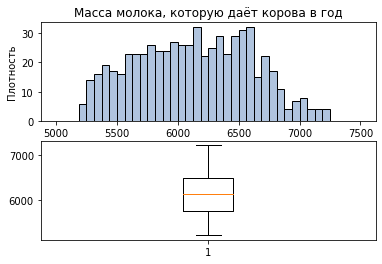

In [47]:
plt.subplot(2,1,1)
plt.hist(data_ferma['удой'],histtype='bar',bins=40,range = (5000, 7500),color = 'lightsteelblue',edgecolor = "black") 
plt.xlabel('Удой,кг')
plt.ylabel('Плотность')
plt.title('Масса молока, которую даёт корова в год')

plt.subplot(2,1,2)
plt.boxplot(data_ferma['удой'])

plt.show()

In [48]:
data_ferma['удой'].describe()

count     629.000000
mean     6125.979332
std       475.478118
min      5204.000000
25%      5751.000000
50%      6133.000000
75%      6501.000000
max      7222.000000
Name: удой, dtype: float64

**В стаде фермера на текущий момент масса молока, которую даёт корова находится в среднем в пределах 6125 кг в год .**

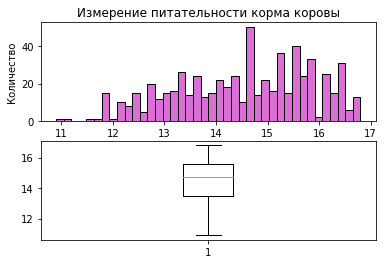

In [49]:
plt.subplot(2,1,1)
plt.hist(data_ferma['эке (энергетическая кормовая единица)'],histtype='bar',bins=40,color = 'orchid',edgecolor = "black") 
plt.xlabel('Энергетическая кормовая единица')
plt.ylabel('Количество')
plt.title('Измерение питательности корма коровы')

plt.subplot(2,1,2)
plt.boxplot(data_ferma['эке (энергетическая кормовая единица)'])

plt.show()

In [50]:
data_ferma['эке (энергетическая кормовая единица)'].describe()

count    629.000000
mean      14.543879
std        1.306408
min       10.900000
25%       13.500000
50%       14.700000
75%       15.600000
max       16.800000
Name: эке (энергетическая кормовая единица), dtype: float64

 **Измерение питательности корма показывает, что в среднем ЭКЕ = 14.5, самая минимальная ЭКЕ = 10.9, а максимальная = 16.8**

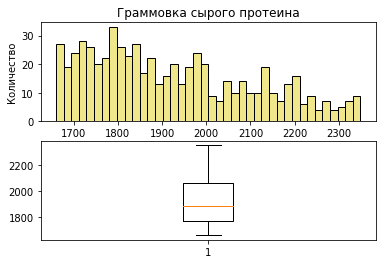

In [51]:
plt.subplot(2,1,1)
plt.hist(data_ferma['сырой протеин, г'],histtype='bar',bins=40,color = 'khaki',edgecolor = "black") 
plt.xlabel('Сырой протеин,г')
plt.ylabel('Количество')
plt.title('Граммовка сырого протеина')

plt.subplot(2,1,2)
plt.boxplot(data_ferma['сырой протеин, г'])

plt.show()

In [52]:
data_ferma['сырой протеин, г'].describe()

count     629.000000
mean     1923.364070
std       182.956251
min      1660.000000
25%      1771.000000
50%      1888.000000
75%      2062.000000
max      2349.000000
Name: сырой протеин, г, dtype: float64

**Содержание сырого протеина в корме в среднем 1923 грамма.**

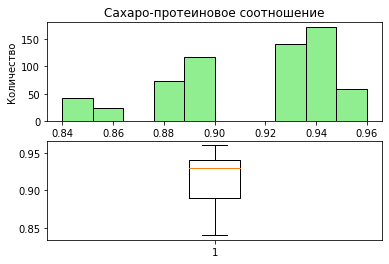

In [53]:
plt.subplot(2,1,1)
plt.hist(data_ferma['спо (сахаро-протеиновое соотношение)'],histtype='bar',bins=10,color = 'lightgreen',edgecolor = "black") 
plt.xlabel('Сахаро-протеиновое соотношение')
plt.ylabel('Количество')
plt.title('Сахаро-протеиновое соотношение')

plt.subplot(2,1,2)
plt.boxplot(data_ferma['спо (сахаро-протеиновое соотношение)'])

plt.show()

In [54]:
data_ferma['спо (сахаро-протеиновое соотношение)'].describe()

count    629.000000
mean       0.913116
std        0.032203
min        0.840000
25%        0.890000
50%        0.930000
75%        0.940000
max        0.960000
Name: спо (сахаро-протеиновое соотношение), dtype: float64

**Максимальное отношение сахара к протеину в корме коровы 0.96, а минимальное 0.84**

In [55]:
fol = ["Равнинные"]
foll = ["Равнинное"]
data_ferma['тип пастбища'] = data_ferma['тип пастбища'].replace(fol, foll, regex=True)
data_ferma['тип пастбища'].sort_values().unique()

array(['Равнинное', 'Холмистое'], dtype=object)

In [56]:
data_ferma['тип пастбища'].value_counts()

Холмистое    351
Равнинное    278
Name: тип пастбища, dtype: int64

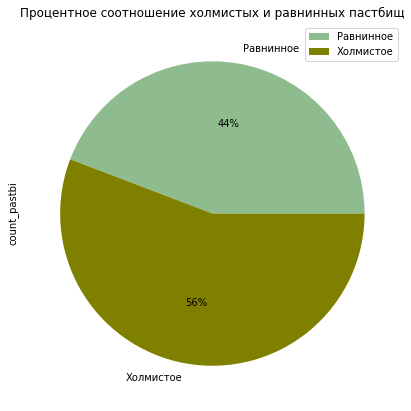

In [57]:
count_pastbi = pd.DataFrame({'тип пастбища': ['Холмистое', 'Равнинное'],'count_pastbi':[351,278]})
count_pastbi.groupby(['тип пастбища']).sum().plot(kind='pie', y='count_pastbi', autopct='%1.0f%%',colors = ( "darkseagreen", "olive"),
figsize=(7,7), title = 'Процентное соотношение холмистых и равнинных пастбищ');

**Ландшафт лугов, на которых паслась корова преимущесствено холмистый, но равнинные луга не сильно отступают в процентном соотношении.**

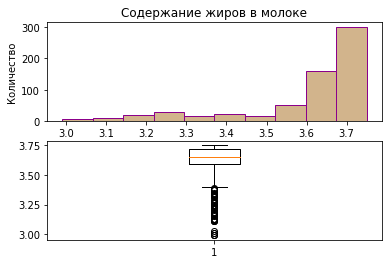

In [58]:
plt.subplot(2,1,1)
plt.hist(data_ferma['жирность,%'],histtype='bar',bins=10,color = 'tan',edgecolor = "darkmagenta") 
plt.xlabel('Жирность молока в процентах')
plt.ylabel('Количество')
plt.title('Содержание жиров в молоке')

plt.subplot(2,1,2)
plt.boxplot(data_ferma['жирность,%'])

plt.show()

In [59]:
data_ferma['жирность,%'].describe()

count    629.000000
mean       3.603657
std        0.168656
min        2.990000
25%        3.590000
50%        3.650000
75%        3.720000
max        3.750000
Name: жирность,%, dtype: float64

**Cодержание жиров в молоке в среднем 3.6%, но есть и максимальный показатель в 3.75%**

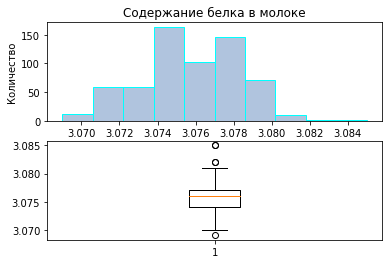

In [60]:
plt.subplot(2,1,1)
plt.hist(data_ferma['белок,%'],histtype='bar',bins=10,color = 'lightsteelblue',edgecolor = "aqua") 
plt.xlabel('Белок в процентах')
plt.ylabel('Количество')
plt.title('Содержание белка в молоке')

plt.subplot(2,1,2)
plt.boxplot(data_ferma['белок,%'])

plt.show()

In [61]:
data_ferma['белок,%'].describe()

count    629.000000
mean       3.075671
std        0.002549
min        3.069000
25%        3.074000
50%        3.076000
75%        3.077000
max        3.085000
Name: белок,%, dtype: float64

**Cодержание белка в молоке в среднем около 3.075%**

In [62]:
data_ferma['вкус молока'].value_counts()

вкусно       371
не вкусно    258
Name: вкус молока, dtype: int64

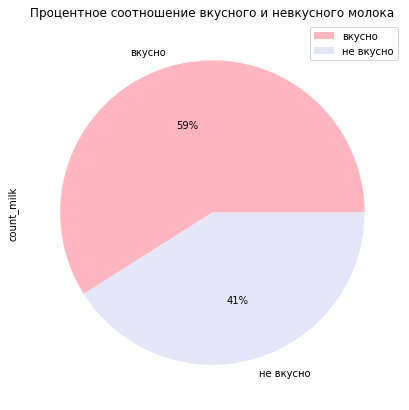

In [63]:
count_milk = pd.DataFrame({'вкус молока': ['вкусно', 'не вкусно'],'count_milk':[371,258]})
count_milk.groupby(['вкус молока']).sum().plot(kind='pie', y='count_milk', autopct='%1.0f%%',colors = ( "lightpink", "lavender"),
figsize=(7,7), title = 'Процентное соотношение вкусного и невкусного молока');

**Больше вкусного молока, это радует:)))**

In [64]:
data_ferma['возраст'].value_counts()

более 2 лет    519
менее 2 лет    110
Name: возраст, dtype: int64

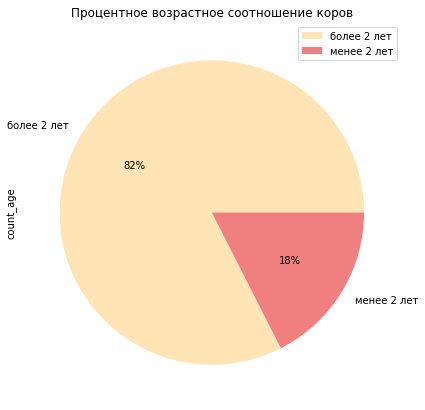

In [65]:
count_age = pd.DataFrame({'возраст': ['более 2 лет', 'менее 2 лет'],'count_age':[518,110]})
count_age.groupby(['возраст']).sum().plot(kind='pie', y='count_age', autopct='%1.0f%%',colors = ( "moccasin", "lightcoral"),
figsize=(7,7), title = 'Процентное возрастное соотношение коров');

**А вот коров у фермера больше тех, чей возраст превышает 2 года, причем больше почти в 4.5 раза, чем молодых.**

In [66]:
data_dad['имя папы'].value_counts()

Барин       240
Буйный      215
Соловчик    110
Геркулес     64
Name: имя папы, dtype: int64

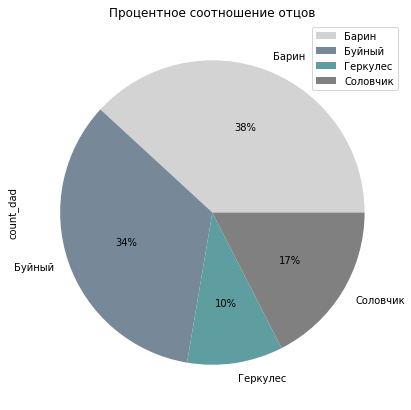

In [67]:
count_dad = pd.DataFrame({'имя папы': ['Барин', 'Буйный','Соловчик','Геркулес'],'count_dad':[240,215,110,64]})
count_dad.groupby(['имя папы']).sum().plot(kind='pie', y='count_dad', autopct='%1.0f%%',colors = ( "lightgrey", "lightslategrey","cadetblue","grey"),
figsize=(7,7), title = 'Процентное соотношение отцов');

**Визуализация имён отцов каждой коровы в стаде фермера показывает, что лидируют Барин и Буйный**

In [68]:
data_cow['порода'].value_counts()

Рефлешн Соверинг    11
Вис Бик Айдиал       9
Name: порода, dtype: int64

**У 'Экофермы' больше всего коров породы Рефлешн Соверинг**

In [69]:
data_cow['тип пастбища'].value_counts()

Равнинное    11
Холмистое     9
Name: тип пастбища, dtype: int64

**Коровы 'Экофермы'пасутся чаще на равнинных лугах, а вот сам фермер пасет коров на холмистых**

In [70]:
data_cow['порода папы_быка'].value_counts()

Соверин    12
Айдиал      8
Name: порода папы_быка, dtype: int64

**Быки 'Экофермы' в большей степени породы Соверин**

In [71]:
data_cow['имя папы'].value_counts()

Буйный      8
Геркулес    6
Барин       4
Соловчик    2
Name: имя папы, dtype: int64

**Буйный в 'Экоферме' оплодотворил коров больше всего.**

In [72]:
data_cow['жирность,%'].value_counts()

3.73    3
3.40    3
3.59    3
3.58    2
3.64    2
3.63    1
3.54    1
3.68    1
3.42    1
3.34    1
3.77    1
3.57    1
Name: жирность,%, dtype: int64

In [73]:
data_cow['жирность,%'].describe()

count    20.000000
mean      3.577500
std       0.126818
min       3.340000
25%       3.510000
50%       3.590000
75%       3.650000
max       3.770000
Name: жирность,%, dtype: float64

**Cодержание жиров в молоке в среднем 3.57%, но есть и максимальный показатель в 3.77%**

In [74]:
data_cow['белок,%'].value_counts()

3.074    5
3.079    3
3.053    2
3.076    2
3.075    1
3.061    1
3.055    1
3.065    1
3.069    1
3.081    1
3.073    1
3.046    1
Name: белок,%, dtype: int64

In [75]:
data_cow['белок,%'].describe()

count    20.000000
mean      3.069500
std       0.010339
min       3.046000
25%       3.064000
50%       3.074000
75%       3.076000
max       3.081000
Name: белок,%, dtype: float64

**Cодержание белка в молоке в среднем 3.06%, но есть и максимальный показатель в 3.08%**

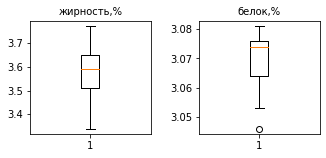

In [76]:
fp = ['жирность,%', 'белок,%']

plt.figure(figsize = (6,3))
a = 1
for i in fp:
    plt.subplot(2, 2, a)
    plt.boxplot(data_cow[i])
    plt.title(i, size = 10)
    a = a + 1

plt.subplots_adjust(left=0.13,
right=0.8,
top=1.4,
bottom= 0.2,
wspace= 0.4,
hspace=0.3)
plt.show()

**Провела визуализацию исследовательских данных**

## Корреляционный анализ

**Проанализируем коэффициенты корреляции целевого признака с другими количественными переменными**

In [77]:
col = ['удой', 'эке (энергетическая кормовая единица)', 'сырой протеин, г', 'спо (сахаро-протеиновое соотношение)',
'жирность,%', 'белок,%']
pro = []
for i in col:
    k, v = spearmanr(data_ferma['удой'], data_ferma[i])
    pro.append({
        'name': i,
        'ks': k,
        'p_value':v
    })
    
corr_data = pd.DataFrame(pro)
corr_data.iloc[1:].sort_values('ks', ascending = False).\
style.set_caption("Корреляция Спирмена для целевого признака ('удой')").\
background_gradient()

,name,ks,p_value
3,спо (сахаро-протеиновое соотношение),0.788193,0.000000
1,эке (энергетическая кормовая единица),0.763352,0.000000
4,"жирность,%",0.687247,0.000000
2,"сырой протеин, г",0.436717,0.000000
5,"белок,%",-0.005716,0.886232


В таблице представлены:
* имена перменных,
* коэффициент корреляции Спирмена,
* уровень значимости полученного коэффициентa.

Удой имеет высокую корреляцию с переменными 'спо (сахаро-протеиновое соотношение)', 'эке (энергетическая кормовая единица)', 'жирность,%'. Совсем не коррелирует с переменной 'белок,%'.
Для изучения связи между исследуемыми входными и целевыми признаками построим диаграмму.

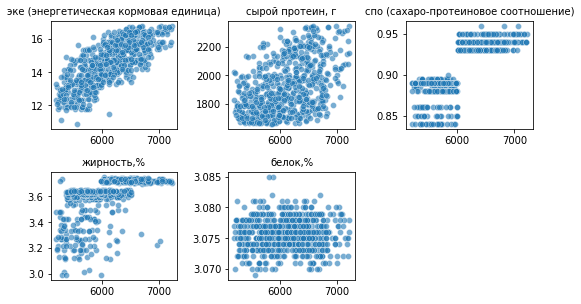

In [78]:
mm = ['удой', 'эке (энергетическая кормовая единица)', 'сырой протеин, г', 'спо (сахаро-протеиновое соотношение)',
'жирность,%', 'белок,%']
ud = data_ferma.query('удой < 40000')

plt.figure(figsize = (10,3))
a = 1
for i in col[1:]:
    plt.subplot(2, 3, a)
    sns.scatterplot(data=ud, x='удой', y=i, alpha = 0.6).set(xlabel = '', ylabel = '')
    plt.title(i, size = 10)
    a = a + 1

plt.subplots_adjust(left=0.13,
                    right=0.8,
                    top=1.4,
                    bottom= 0.2,
                    wspace= 0.4,
                    hspace=0.4)
plt.show()

Как можно видеть, лишь по отношению к переменной 'эке (энергетическая кормовая единица)' можно увидеть какую-либо линейную связь, все остальные переменные связаны с целевым признаком нелинейным образом.

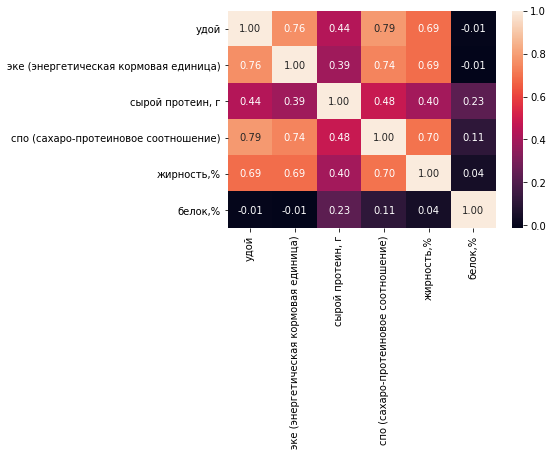

In [79]:
sns.heatmap(ud.loc[:, col].corr(method = 'spearman'), annot=True, fmt='.2f')
plt.show()

**На представленой тепловой карте можно видеть достаточно высокие коэфциенты корреляции между входными признаками, что может вести к мультиколлинеарности. Наиболее сильная корреляции существует между признаками:**

* 'эке (энергетическая кормовая единица)' и 'спо (сахаро-протеиновое соотношение)'
* 'эке (энергетическая кормовая единица)' и 'жирность,%'
* 'жирность,%' и 'спо (сахаро-протеиновое соотношение)'

**Все три признака тесно связаны между собой корреляционными связями и будут создавать эффект мультиколлинеарности.**

In [80]:
data_ferma[data_ferma.columns[data_ferma.columns != 'id']].phik_matrix()
display(data_ferma[data_ferma.columns[data_ferma.columns != 'id']].phik_matrix())

interval columns not set, guessing: ['удой', 'эке (энергетическая кормовая единица)', 'сырой протеин, г', 'спо (сахаро-протеиновое соотношение)', 'жирность,%', 'белок,%']
interval columns not set, guessing: ['удой', 'эке (энергетическая кормовая единица)', 'сырой протеин, г', 'спо (сахаро-протеиновое соотношение)', 'жирность,%', 'белок,%']


,удой,эке (энергетическая кормовая единица),"сырой протеин, г",спо (сахаро-протеиновое соотношение),порода,тип пастбища,порода папы_быка,"жирность,%","белок,%",вкус молока,возраст
удой,1.000000,0.717481,0.464169,0.661700,0.163353,0.280615,0.517070,0.705068,0.074696,0.178895,0.998072
эке (энергетическая кормовая единица),0.717481,1.000000,0.461466,0.589307,0.129219,0.103065,0.166325,0.717846,0.000000,0.271287,0.768438
"сырой протеин, г",0.464169,0.461466,1.000000,0.385900,0.091102,0.096474,0.000000,0.401560,0.204052,0.171465,0.351685
спо (сахаро-протеиновое соотношение),0.661700,0.589307,0.385900,1.000000,0.064396,0.158532,0.427779,0.644730,0.074004,0.569538,0.744653
порода,0.163353,0.129219,0.091102,0.064396,1.000000,0.211084,0.091673,0.223584,0.361880,0.000000,0.055837
тип пастбища,0.280615,0.103065,0.096474,0.158532,0.211084,1.000000,0.000000,0.000000,0.101419,0.270583,0.129482
порода папы_быка,0.517070,0.166325,0.000000,0.427779,0.091673,0.000000,1.000000,0.000000,0.132270,0.000000,0.356573
"жирность,%",0.705068,0.717846,0.401560,0.644730,0.223584,0.000000,0.000000,1.000000,0.000000,0.198952,0.674410
"белок,%",0.074696,0.000000,0.204052,0.074004,0.361880,0.101419,0.132270,0.000000,1.000000,0.145850,0.000000
вкус молока,0.178895,0.271287,0.171465,0.569538,0.000000,0.270583,0.000000,0.198952,0.145850,1.000000,0.166869


**Коэффициенты взаимосвязи посчитали путем вызова метода phik_matrix**

**Из данного раздела следует:**

* Cвязь целевого признака удоя молока линейная с признаком эке (энергетическая кормовая единица);
* Связь целевого признака удоя молока с другими признаками нелинейная;
* Мультиколинеарность наблюдается.

In [81]:
data_ferma.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 629 entries, 0 to 628
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     629 non-null    int64  
 1   удой                                   629 non-null    int64  
 2   эке (энергетическая кормовая единица)  629 non-null    float64
 3   сырой протеин, г                       629 non-null    int64  
 4   спо (сахаро-протеиновое соотношение)   629 non-null    float64
 5   порода                                 629 non-null    object 
 6   тип пастбища                           629 non-null    object 
 7   порода папы_быка                       629 non-null    object 
 8   жирность,%                             629 non-null    float64
 9   белок,%                                629 non-null    float64
 10  вкус молока                            629 non-null    object 
 11  возрас

## Обучение модели линейной регрессии

**Построим модель линейной регрессии на данных датасета farm_main.csv. Используем в качестве целевого - признак удой.**

In [82]:
RANDOM_STATE = 42


X = data_ferma.drop('удой', axis=1)
y = data_ferma['удой']

X_train, X_test, y_train, y_test = train_test_split(
X, 
y, 
random_state=RANDOM_STATE)
cat_col_names =  ['порода','тип пастбища','порода папы_быка','возраст']
num_col_names = ['эке (энергетическая кормовая единица)','сырой протеин, г','спо (сахаро-протеиновое соотношение)']

encoder = OneHotEncoder(drop='first', sparse=False) 
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])

encoder_col_names = encoder.get_feature_names() 

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)
     
model_lr  = LinearRegression()
model_lr.fit(X_train, y_train)
    
predictions = model_lr.predict(X_test)

r2 = r2_score(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test,predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)
# вывод полученных значений
print(f"R2 LinearRegression = {r2:.3f}")
print(f"MAE LinearRegression = {mae:.0f}")
print(f"MSE LinearRegression = {mse:.0f}")
print(f"RMSE LinearRegression = {rmse:.0f}")

R2 LinearRegression = 0.819
MAE LinearRegression = 181
MSE LinearRegression = 49615
RMSE LinearRegression = 223


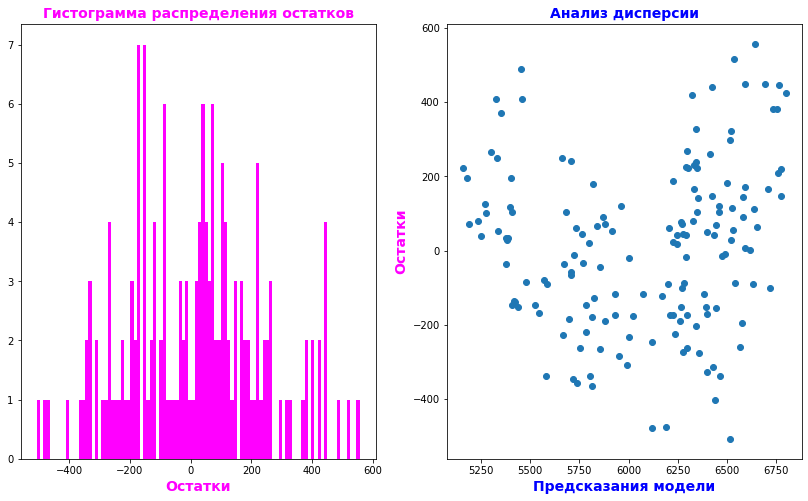

In [83]:
residuals = y_test - predictions
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,8))
axes[0].hist(residuals, bins = 100, color = 'magenta')
axes[0].set_title('Гистограмма распределения остатков', fontsize = 14, fontweight = 'bold', color = 'magenta')
axes[0].set_xlabel('Остатки', fontsize = 14, fontweight = 'bold', color = 'magenta')
axes[1].scatter(x = predictions, y = residuals)
axes[1].set_xlabel('Предсказания модели', fontsize = 14, fontweight = 'bold', color = 'blue')
axes[1].set_ylabel('Остатки', fontsize = 14, fontweight = 'bold', color = 'magenta')
axes[1].set_title('Анализ дисперсии', fontsize = 14, fontweight = 'bold', color = 'blue')
plt.show()

* Коэффициент детерминации равен 0.81 .Этот результат пока еще трудно считать удовлетворительным. Тем не менее модель уже сейчас может предстказывать порядка 80% дисперсии целевого признака;

* Анализ остатаков демонстрирует тот факт, что они распределены не случайным образом. Гистограмма немного смещена влево;

* Таким образом, модель лучше не использовать из-за непостоянства дисперсии, ее нужно улучшить;

* Для получения более точного прогноза нужны дополнительные исследования и доработка или изменение модели.

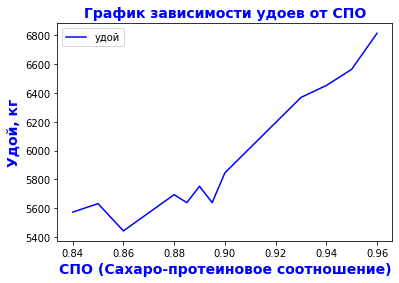

In [84]:
data_ferma.pivot_table(index='спо (сахаро-протеиновое соотношение)', values='удой', aggfunc='median').plot(color = 'blue')
plt.xlabel('СПО (Сахаро-протеиновое соотношение)', fontsize=14, fontweight="bold", color='blue')
plt.ylabel('Удой, кг', fontsize=14, fontweight="bold", color='blue')
plt.title('График зависимости удоев от СПО', fontsize=14, fontweight="bold", color='blue')
plt.show()

**Значение 0.9 является границой нелинейности,что ясно еще из графика в корреляционном исследовании. Введем спо (сахаро-протеиновое соотношение) в котегориальный признак,учтя полученное значение границы нелинейности, а также новый параметр - эке в квадрате.**

In [85]:
cpo_mean = data_ferma['спо (сахаро-протеиновое соотношение)'].mean()
data_ferma['спо (сахаро-протеиновое соотношение)'] = data_ferma['спо (сахаро-протеиновое соотношение)'].apply(lambda x: 1 if x > 0.9 else 0)

In [86]:
data_ferma['эке в квадрате'] = data_ferma['эке (энергетическая кормовая единица)']**2

In [87]:
RANDOM_STATE = 42


X = data_ferma.drop('удой', axis=1)
y = data_ferma['удой']

X_train, X_test, y_train, y_test = train_test_split(
X,
y,
random_state=RANDOM_STATE)

cat_col_names = ['порода','тип пастбища','порода папы_быка','возраст','спо (сахаро-протеиновое соотношение)']
num_col_names = ['эке в квадрате','сырой протеин, г']

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

# инициализируем модель линейной регрессии
model_lr = LinearRegression()

# обучаем модель на тренировочных данных
model_lr.fit(X_train, y_train)

# получим предсказания модели на тестовых данных
# сохраним результат в переменную predictions
predictions2 = model_lr.predict(X_test)

a_r2 = r2_score(y_test, predictions2)
a_mae = mean_absolute_error(y_test, predictions2)
a_mse = mean_squared_error(y_test,predictions2)
a_rmse = mean_squared_error(y_test, predictions2, squared=False)



# вывод полученных значений
print(f"R2 LinearRegression = {a_r2:.3f}")
print(f"MAE LinearRegression = {a_mae:.0f}")
print(f"MSE LinearRegression = {a_mse:.0f}")
print(f"RMSE LinearRegression = {a_rmse:.0f}")

R2 LinearRegression = 0.789
MAE LinearRegression = 194
MSE LinearRegression = 57934
RMSE LinearRegression = 241


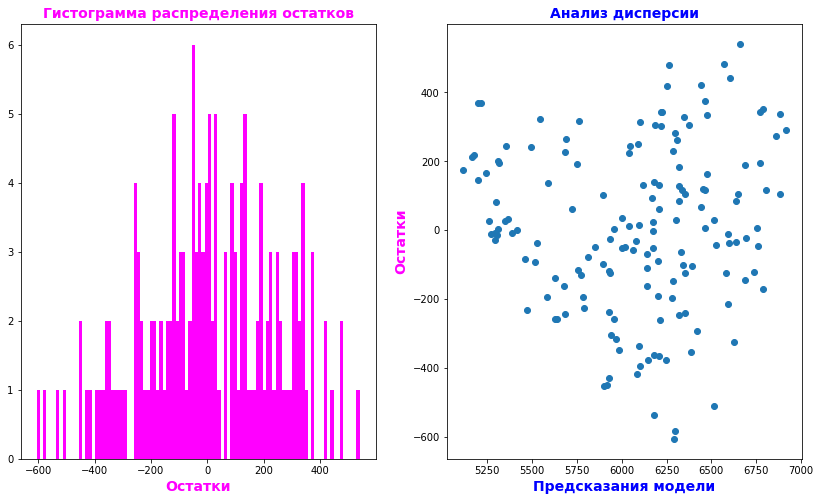

In [88]:
residuals2 = y_test - predictions2
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,8))
axes[0].hist(residuals2, bins = 100, color = 'magenta')
axes[0].set_title('Гистограмма распределения остатков', fontsize = 14, fontweight = 'bold', color = 'magenta')
axes[0].set_xlabel('Остатки', fontsize = 14, fontweight = 'bold', color = 'magenta')
axes[1].scatter(x = predictions2, y = residuals2)
axes[1].set_xlabel('Предсказания модели', fontsize = 14, fontweight = 'bold', color = 'blue')
axes[1].set_ylabel('Остатки', fontsize = 14, fontweight = 'bold', color = 'magenta')
axes[1].set_title('Анализ дисперсии', fontsize = 14, fontweight = 'bold', color = 'blue')
plt.show()

* Коэффициент детерминации увеличился, теперь модель способна объяснять порядка 82% дисперсии целевого признака.

* Распределение остатков приближается к нормальному и носит более случайный характер. 

* Улучшение модели возможно за счет добавления новых признаков.

**Построим модель линейной регрессии с учетом нового признака - имя папы из файла ferma_dad.csv**

In [89]:
data_ferma_dad = data_ferma.merge(data_dad, on=('id'), how='inner')
data_ferma_dad.info()
data_ferma_dad

<class 'pandas.core.frame.DataFrame'>
Int64Index: 629 entries, 0 to 628
Data columns (total 14 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     629 non-null    int64  
 1   удой                                   629 non-null    int64  
 2   эке (энергетическая кормовая единица)  629 non-null    float64
 3   сырой протеин, г                       629 non-null    int64  
 4   спо (сахаро-протеиновое соотношение)   629 non-null    int64  
 5   порода                                 629 non-null    object 
 6   тип пастбища                           629 non-null    object 
 7   порода папы_быка                       629 non-null    object 
 8   жирность,%                             629 non-null    float64
 9   белок,%                                629 non-null    float64
 10  вкус молока                            629 non-null    object 
 11  возрас

,id,удой,эке (энергетическая кормовая единица),"сырой протеин, г",спо (сахаро-протеиновое соотношение),порода,тип пастбища,порода папы_быка,"жирность,%","белок,%",вкус молока,возраст,эке в квадрате,имя папы
0,1,5863,14.2,1743,0,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более 2 лет,201.64,Буйный
1,2,5529,12.8,2138,0,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее 2 лет,163.84,Соловчик
2,3,5810,14.0,1854,0,Рефлешн Соверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более 2 лет,196.00,Барин
3,4,5895,12.4,2012,0,Рефлешн Соверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более 2 лет,153.76,Буйный
4,5,5302,12.8,1675,0,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее 2 лет,163.84,Барин
5,6,5254,12.7,1806,0,Рефлешн Соверинг,Холмистое,Соверин,3.13,3.078,вкусно,менее 2 лет,161.29,Барин
6,7,5910,13.2,1792,0,Вис Бик Айдиал,Равнинное,Соверин,3.48,3.077,вкусно,более 2 лет,174.24,Соловчик
7,8,6179,14.7,1806,1,Вис Бик Айдиал,Равнинное,Айдиал,3.55,3.076,вкусно,более 2 лет,216.09,Геркулес
8,9,6783,14.2,1918,1,Рефлешн Соверинг,Холмистое,Айдиал,3.71,3.077,вкусно,более 2 лет,201.64,Буйный
9,10,5339,13.4,1791,0,Вис Бик Айдиал,Холмистое,Соверин,3.13,3.075,вкусно,менее 2 лет,179.56,Барин


In [90]:
RANDOM_STATE = 42


X = data_ferma_dad.drop('удой', axis=1)
y = data_ferma_dad['удой']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=RANDOM_STATE)

cat_col_names = ['порода', 'тип пастбища', 'порода папы_быка', 'возраст', 'имя папы','спо (сахаро-протеиновое соотношение)']
num_col_names = ['эке в квадрате', 'сырой протеин, г']


## подготовка признаков для масштабирования и кодирования
scaler = StandardScaler()
 
# обучение и трансформация количественных признаков из тренировочной выборки 
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
 
# преобразование количественных признаков в тестовой выборке
X_test_scaled = scaler.transform(X_test[num_col_names])
 
encoder = OneHotEncoder(drop='first', sparse=False)
 
# обучение и трансформация категориальные признаки из тренировочной выборки 
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
 
# преобразование категориальных признаков в тестовой выборке
X_test_ohe = encoder.transform(X_test[cat_col_names])
 
# список новых столбцов и сохраните в новой переменной 
encoder_col_names = encoder.get_feature_names()
 
# создаём тренировочный и тестовый датафреймы из закодированных и отмасштабированных данных
 
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)
 
X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)
 
# сбрасываем индексы в датафрейме с числовыми индексами, чтобы избежать ошибок
X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)
# инициализируем модель линейной регрессии
model_lr = LinearRegression()

# обучаем модель на тренировочных данных
model_lr.fit(X_train, y_train)

# получим предсказания модели на тестовых данных
# сохраним результат в переменную predictions
predictions3 = model_lr.predict(X_test)


r2 = r2_score(y_test, predictions3)
mae = mean_absolute_error(y_test, predictions3)
mse = mean_squared_error(y_test,predictions3)
rmse = mean_squared_error(y_test, predictions3, squared=False)
# вывод полученных значений
print(f"R2 LinearRegression = {r2:.2f}")
print(f"MAE LinearRegression = {mae:.0f}")
print(f"MSE LinearRegression = {mse:.0f}")
print(f"RMSE LinearRegression = {rmse:.0f}")

R2 LinearRegression = 0.86
MAE LinearRegression = 153
MSE LinearRegression = 37651
RMSE LinearRegression = 194


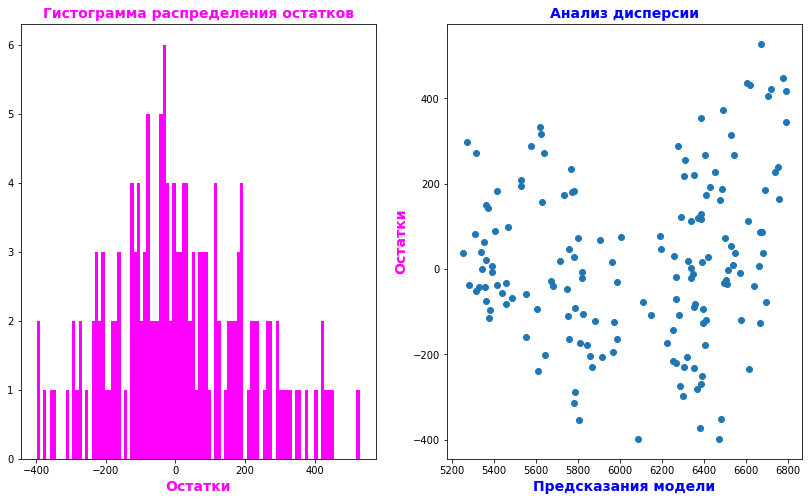

In [91]:
residuals3 = y_test - predictions3
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,8))
axes[0].hist(residuals3, bins = 100, color = 'magenta')
axes[0].set_title('Гистограмма распределения остатков', fontsize = 14, fontweight = 'bold', color = 'magenta')
axes[0].set_xlabel('Остатки', fontsize = 14, fontweight = 'bold', color = 'magenta')
axes[1].scatter(x = predictions3, y = residuals3)
axes[1].set_xlabel('Предсказания модели', fontsize = 14, fontweight = 'bold', color = 'blue')
axes[1].set_ylabel('Остатки', fontsize = 14, fontweight = 'bold', color = 'magenta')
axes[1].set_title('Анализ дисперсии', fontsize = 14, fontweight = 'bold', color = 'blue')
plt.show()

* Коэффиент детерминации увеличился
* Остатки сохраняют примерно ту же стркутуру, что и при второй модели.


In [92]:
residuals3.quantile([0.025, 0.975])

0.025   -351.465448
0.975    423.344250
Name: удой, dtype: float64

**Доверительный интервал прогноза это интервал, в котором будут находиться наши прогнозы с заданной вероятностью. Как правило, вероятность берут равной 95%. Нижней границей будет 0.025 квантиль, а верхней 0.975 на предсказаниях модели.**

<div class="alert alert-info">
<font size="4", color = "black"><b>✍ Комментарий студента</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Добавила доверительный интервал.

<div class="alert alert-success">
<b>КОММЕНТАРИЙ V2</b> 	

Да, спасибо, теперь всё ОК, согласно требований ТЗ (брифа)!
</div>

**Сопоставив значения R2,можно сделать вывод о том, последняя модель является более точной. Значение R2 ближе к единице. Анализ данных других метрик MSE, MAE, RMSE демонстрируют минимальное их значение в этой модели.**

In [94]:
data_cow['эке (энергетическая кормовая единица)'] = data_ferma['эке (энергетическая кормовая единица)'].mean()*1.05
data_cow['эке в квадрате'] = data_cow['эке (энергетическая кормовая единица)']**2
data_cow['сырой протеин, г'] = data_ferma['сырой протеин, г'].mean()*1.05
data_cow['спо (сахаро-протеиновое соотношение)'] = cpo_mean*1.05
data_cow['возраст'] = 'менее_2_лет'
data_cow['удой'] = 0
data_cow['спо (сахаро-протеиновое соотношение)'] = data_cow['спо (сахаро-протеиновое соотношение)'].apply(lambda x: 1 if x > 0.9 else 0)
data_cow['возраст'] = data_cow['возраст'].apply(lambda x: 1 if x == 'Более 2 лет' else 0)
display(data_cow)


,порода,тип пастбища,порода папы_быка,имя папы,"жирность,%","белок,%",эке (энергетическая кормовая единица),эке в квадрате,"сырой протеин, г",спо (сахаро-протеиновое соотношение),возраст,удой
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,15.271073,233.205675,2019.532273,1,0,0
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,15.271073,233.205675,2019.532273,1,0,0
2,Рефлешн Соверинг,Равнинное,Соверин,Барин,3.59,3.074,15.271073,233.205675,2019.532273,1,0,0
3,Рефлешн Соверинг,Холмистое,Айдиал,Буйный,3.40,3.061,15.271073,233.205675,2019.532273,1,0,0
4,Рефлешн Соверинг,Равнинное,Айдиал,Буйный,3.64,3.074,15.271073,233.205675,2019.532273,1,0,0
5,Рефлешн Соверинг,Равнинное,Соверин,Геркулес,3.63,3.053,15.271073,233.205675,2019.532273,1,0,0
6,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,15.271073,233.205675,2019.532273,1,0,0
7,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.57,3.079,15.271073,233.205675,2019.532273,1,0,0
8,Рефлешн Соверинг,Равнинное,Соверин,Барин,3.59,3.074,15.271073,233.205675,2019.532273,1,0,0
9,Рефлешн Соверинг,Холмистое,Айдиал,Буйный,3.40,3.079,15.271073,233.205675,2019.532273,1,0,0


In [95]:
data_ferma_dad['возраст'] = data_ferma_dad['возраст'].apply(lambda x: 1 if x == 'более 2 лет' else 0)

**Применим лучшую по качеству и по точности модель к данным из датасета cow_buy_old.csv для прогноза удоя коров, которых фермер хочет приобрести.**

In [96]:
data_ferma_dad.head()

,id,удой,эке (энергетическая кормовая единица),"сырой протеин, г",спо (сахаро-протеиновое соотношение),порода,тип пастбища,порода папы_быка,"жирность,%","белок,%",вкус молока,возраст,эке в квадрате,имя папы
0,1,5863,14.2,1743,0,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,1,201.64,Буйный
1,2,5529,12.8,2138,0,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,0,163.84,Соловчик
2,3,5810,14.0,1854,0,Рефлешн Соверинг,Холмистое,Соверин,3.59,3.074,не вкусно,1,196.00,Барин
3,4,5895,12.4,2012,0,Рефлешн Соверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,1,153.76,Буйный
4,5,5302,12.8,1675,0,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,0,163.84,Барин


In [97]:
data_ferma_dad.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 629 entries, 0 to 628
Data columns (total 14 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     629 non-null    int64  
 1   удой                                   629 non-null    int64  
 2   эке (энергетическая кормовая единица)  629 non-null    float64
 3   сырой протеин, г                       629 non-null    int64  
 4   спо (сахаро-протеиновое соотношение)   629 non-null    int64  
 5   порода                                 629 non-null    object 
 6   тип пастбища                           629 non-null    object 
 7   порода папы_быка                       629 non-null    object 
 8   жирность,%                             629 non-null    float64
 9   белок,%                                629 non-null    float64
 10  вкус молока                            629 non-null    object 
 11  возрас

In [98]:
data_ferma_dad.head()

,id,удой,эке (энергетическая кормовая единица),"сырой протеин, г",спо (сахаро-протеиновое соотношение),порода,тип пастбища,порода папы_быка,"жирность,%","белок,%",вкус молока,возраст,эке в квадрате,имя папы
0,1,5863,14.2,1743,0,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,1,201.64,Буйный
1,2,5529,12.8,2138,0,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,0,163.84,Соловчик
2,3,5810,14.0,1854,0,Рефлешн Соверинг,Холмистое,Соверин,3.59,3.074,не вкусно,1,196.00,Барин
3,4,5895,12.4,2012,0,Рефлешн Соверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,1,153.76,Буйный
4,5,5302,12.8,1675,0,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,0,163.84,Барин


In [99]:
X_train = data_ferma_dad
X_test = data_cow

target = 'удой'
cat_col_names = ['порода', 'тип пастбища', 'порода папы_быка', 'возраст', 'имя папы','спо (сахаро-протеиновое соотношение)']
num_col_names = ['эке в квадрате', 'сырой протеин, г']


X = X_train.drop(target, axis=1)
y = X_train[target]

encoder = OneHotEncoder(handle_unknown='ignore', sparse=False) 
X_ohe = encoder.fit_transform(X[cat_col_names])

encoder_col_names = encoder.get_feature_names() #get_feature_names_out()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[num_col_names])

X_ohe = pd.DataFrame(X_ohe, columns=encoder_col_names)

X_scaled = pd.DataFrame(X_scaled, columns=num_col_names)

X = pd.concat([X_ohe, X_scaled], axis=1)
                  
model_lr  = LinearRegression()
model_lr.fit(X, y) 

X = X_test.drop(target, axis=1)
y = X_test[target]

X_ohe = encoder.transform(X[cat_col_names])

encoder_col_names = encoder.get_feature_names()

X_scaled = scaler.transform(X[num_col_names])

X_ohe = pd.DataFrame(X_ohe, columns=encoder_col_names)
X_scaled = pd.DataFrame(X_scaled, columns=num_col_names)

X_cow = pd.concat([X_ohe, X_scaled], axis=1)   

predictions = model_lr.predict(X_cow)

data_cow = data_cow.reset_index(drop=True)


for i in range(len(data_cow['удой'])):
    data_cow.loc[i,'удой'] = predictions[i]


display(data_cow.sort_values(by = 'удой', ascending = False))  

,порода,тип пастбища,порода папы_быка,имя папы,"жирность,%","белок,%",эке (энергетическая кормовая единица),эке в квадрате,"сырой протеин, г",спо (сахаро-протеиновое соотношение),возраст,удой
9,Рефлешн Соверинг,Холмистое,Айдиал,Буйный,3.40,3.079,15.271073,233.205675,2019.532273,1,0,6374.8125
3,Рефлешн Соверинг,Холмистое,Айдиал,Буйный,3.40,3.061,15.271073,233.205675,2019.532273,1,0,6374.8125
15,Рефлешн Соверинг,Холмистое,Айдиал,Буйный,3.40,3.065,15.271073,233.205675,2019.532273,1,0,6374.8125
17,Рефлешн Соверинг,Равнинное,Соверин,Геркулес,3.77,3.053,15.271073,233.205675,2019.532273,1,0,6370.5625
5,Рефлешн Соверинг,Равнинное,Соверин,Геркулес,3.63,3.053,15.271073,233.205675,2019.532273,1,0,6370.5625
11,Рефлешн Соверинг,Равнинное,Соверин,Геркулес,3.73,3.073,15.271073,233.205675,2019.532273,1,0,6370.5625
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,15.271073,233.205675,2019.532273,1,0,6364.8125
6,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,15.271073,233.205675,2019.532273,1,0,6364.8125
12,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.68,3.046,15.271073,233.205675,2019.532273,1,0,6364.8125
19,Рефлешн Соверинг,Равнинное,Айдиал,Буйный,3.64,3.074,15.271073,233.205675,2019.532273,1,0,6325.9375


In [100]:
data_cow.sort_values (by = ['удой'], ascending = False).loc[data_cow['удой'] >= 6000]

,порода,тип пастбища,порода папы_быка,имя папы,"жирность,%","белок,%",эке (энергетическая кормовая единица),эке в квадрате,"сырой протеин, г",спо (сахаро-протеиновое соотношение),возраст,удой
9,Рефлешн Соверинг,Холмистое,Айдиал,Буйный,3.40,3.079,15.271073,233.205675,2019.532273,1,0,6374.8125
3,Рефлешн Соверинг,Холмистое,Айдиал,Буйный,3.40,3.061,15.271073,233.205675,2019.532273,1,0,6374.8125
15,Рефлешн Соверинг,Холмистое,Айдиал,Буйный,3.40,3.065,15.271073,233.205675,2019.532273,1,0,6374.8125
17,Рефлешн Соверинг,Равнинное,Соверин,Геркулес,3.77,3.053,15.271073,233.205675,2019.532273,1,0,6370.5625
5,Рефлешн Соверинг,Равнинное,Соверин,Геркулес,3.63,3.053,15.271073,233.205675,2019.532273,1,0,6370.5625
11,Рефлешн Соверинг,Равнинное,Соверин,Геркулес,3.73,3.073,15.271073,233.205675,2019.532273,1,0,6370.5625
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,15.271073,233.205675,2019.532273,1,0,6364.8125
6,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,15.271073,233.205675,2019.532273,1,0,6364.8125
12,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.68,3.046,15.271073,233.205675,2019.532273,1,0,6364.8125
19,Рефлешн Соверинг,Равнинное,Айдиал,Буйный,3.64,3.074,15.271073,233.205675,2019.532273,1,0,6325.9375


Можно сделать следующие выводы о разделе:

* Построены модели линейной регрессии на данных датасета farm_main.csv и определена по значениям метрик более точная;
* Полученное значение R2 = 0.86, которая ближе к единице в более точной модели.
* Применена лучшая по качеству и по точности модель к данным из датасета cow_buy_old.csv и получен прогноз удоя коров.
* Определен прогноз коров с ассоциации пастбищ "ЭкоФерма" с удоем не менее 6000 кг в год.

## Обучение модели логистичекой регрессии

**Построим модель логистической регрессии на данных датасета farm_main.csv. Используем в качестве целевого признак -  вкус молока**

In [101]:
data_ferma['возраст'] = data_ferma['возраст'].apply(lambda x: 1 if x == 'более 2 лет' else 0)
data_ferma['вкус молока'] = data_ferma['вкус молока'].apply(lambda x: 1 if x == 'вкусно' else 0)
data_cow['вкус молока'] = 0

In [102]:

RANDOM_STATE = 42


X = data_ferma.drop(columns='вкус молока', axis=1)
y = data_ferma['вкус молока']

# Разобьем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    random_state=RANDOM_STATE
)

cat_col_names = ['порода','тип пастбища','порода папы_быка','возраст']
num_col_names = ['эке (энергетическая кормовая единица)','сырой протеин, г','спо (сахаро-протеиновое соотношение)', 'жирность,%' , 'белок,%']

encoder = OneHotEncoder(drop='first', sparse=False) 
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])

encoder_col_names = encoder.get_feature_names() 

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

clf = LogisticRegression()

clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)  

y_proba = clf.predict_proba(X_test)[:,1]

data = pd.DataFrame(zip(y_test, y_proba, y_pred), columns = ['y_valid', 'y_proba', 'y_pred'])

display(data) 

,y_valid,y_proba,y_pred
0,0,0.485778,0
1,1,0.708342,1
2,1,0.611919,1
3,0,0.291137,0
4,1,0.763734,1
5,1,0.794797,1
6,0,0.220797,0
7,1,0.678625,1
8,1,0.763607,1
9,0,0.321832,0


In [103]:
thresholds = [round(i,2) for i in np.linspace(0.7,0.9,num = 20,endpoint=False)]
print(thresholds) 

[0.7, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89]


In [104]:
# создаём переменную, которая будет хранить список новых колонок
columns = []
# добавьте столбцы с новыми предсказаниями в таблицу
for i in thresholds:
    columns.append('y_pred_'+str(i))
    data['y_pred_'+str(i)] = data['y_proba'].apply(lambda x: 1 if x >= i else 0)

# выведем 5 случайных строк
data.sample(5)

,y_valid,y_proba,y_pred,y_pred_0.7,y_pred_0.71,y_pred_0.72,y_pred_0.73,y_pred_0.74,y_pred_0.75,y_pred_0.76,...,y_pred_0.8,y_pred_0.81,y_pred_0.82,y_pred_0.83,y_pred_0.84,y_pred_0.85,y_pred_0.86,y_pred_0.87,y_pred_0.88,y_pred_0.89
67,1,0.497629,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17,1,0.828768,1,1,1,1,1,1,1,1,...,1,1,1,0,0,0,0,0,0,0
64,1,0.638389,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0.708342,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50,1,0.794660,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


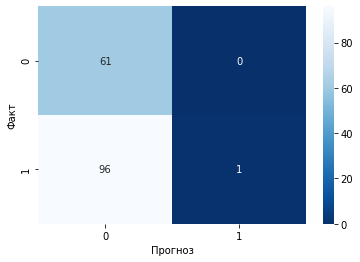

In [105]:
# Рассчитываем метрики на тестовых данных
cm = confusion_matrix(y_test, data['y_pred_0.86'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r').set(xlabel='Прогноз', ylabel='Факт');

In [106]:
acc = accuracy_score(y_test, data['y_pred_0.86'])
precision = precision_score(y_test, data['y_pred_0.86'])
recall = recall_score(y_test, data['y_pred_0.86'])

print('acc: ', round(acc, 3))
print('precision: ', round(precision, 3))
print('recall: ', round(recall, 3))

acc:  0.392
precision:  1.0
recall:  0.01


In [107]:
X_train = data_ferma_dad
X_test = data_cow

target = 'вкус молока'
cat_col_names = ['порода', 'тип пастбища', 'порода папы_быка', 'возраст']
num_col_names = ['эке (энергетическая кормовая единица)', 'сырой протеин, г', 
     'спо (сахаро-протеиновое соотношение)', 'жирность,%' , 'белок,%']

X = X_train.drop(target, axis=1)
y = X_train[target]

encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
X_ohe = encoder.fit_transform(X[cat_col_names])

encoder_col_names = encoder.get_feature_names()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[num_col_names])

X_ohe = pd.DataFrame(X_ohe, columns=encoder_col_names)

X_scaled = pd.DataFrame(X_scaled, columns=num_col_names)

X = pd.concat([X_ohe, X_scaled], axis=1)
                  
clf = LogisticRegression()
clf = clf.fit(X, y)

X = X_test.drop(target, axis=1)
y = X_test[target]

X_ohe = encoder.transform(X[cat_col_names])

encoder_col_names = encoder.get_feature_names()

X_scaled = scaler.transform(X[num_col_names])

X_ohe = pd.DataFrame(X_ohe, columns=encoder_col_names)
X_scaled = pd.DataFrame(X_scaled, columns=num_col_names)

X_cow = pd.concat([X_ohe, X_scaled], axis=1)   


y_pred = clf.predict(X_cow)


data_cow = data_cow.reset_index(drop=True)

for i in range(len(data_cow['вкус молока'])):
    data_cow.loc[i,'вкус молока'] = y_pred[i]
    
data_cow['возраст'] = data_cow['возраст'].apply(lambda x: 'Более 2 лет' if x == 1 else 'Менее 2 лет')   
display(data_cow.sort_values (by = ['вкус молока'], ascending = True))

,порода,тип пастбища,порода папы_быка,имя папы,"жирность,%","белок,%",эке (энергетическая кормовая единица),эке в квадрате,"сырой протеин, г",спо (сахаро-протеиновое соотношение),возраст,удой,вкус молока
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,15.271073,233.205675,2019.532273,1,Менее 2 лет,6364.8125,вкусно
16,Вис Бик Айдиал,Холмистое,Соверин,Соловчик,3.73,3.079,15.271073,233.205675,2019.532273,1,Менее 2 лет,6133.8125,вкусно
13,Вис Бик Айдиал,Холмистое,Соверин,Барин,3.42,3.075,15.271073,233.205675,2019.532273,1,Менее 2 лет,6097.8125,вкусно
7,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.57,3.079,15.271073,233.205675,2019.532273,1,Менее 2 лет,6313.3125,вкусно
6,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,15.271073,233.205675,2019.532273,1,Менее 2 лет,6364.8125,вкусно
9,Рефлешн Соверинг,Холмистое,Айдиал,Буйный,3.40,3.079,15.271073,233.205675,2019.532273,1,Менее 2 лет,6374.8125,вкусно
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,15.271073,233.205675,2019.532273,1,Менее 2 лет,6313.3125,вкусно
4,Рефлешн Соверинг,Равнинное,Айдиал,Буйный,3.64,3.074,15.271073,233.205675,2019.532273,1,Менее 2 лет,6325.9375,не вкусно
3,Рефлешн Соверинг,Холмистое,Айдиал,Буйный,3.40,3.061,15.271073,233.205675,2019.532273,1,Менее 2 лет,6374.8125,не вкусно
8,Рефлешн Соверинг,Равнинное,Соверин,Барин,3.59,3.074,15.271073,233.205675,2019.532273,1,Менее 2 лет,6082.5625,не вкусно


In [108]:
data_cow.sort_values (by = ['вкус молока'], ascending = False).loc[data_cow['вкус молока'] == 'вкусно']

,порода,тип пастбища,порода папы_быка,имя папы,"жирность,%","белок,%",эке (энергетическая кормовая единица),эке в квадрате,"сырой протеин, г",спо (сахаро-протеиновое соотношение),возраст,удой,вкус молока
9,Рефлешн Соверинг,Холмистое,Айдиал,Буйный,3.40,3.079,15.271073,233.205675,2019.532273,1,Менее 2 лет,6374.8125,вкусно
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,15.271073,233.205675,2019.532273,1,Менее 2 лет,6313.3125,вкусно
7,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.57,3.079,15.271073,233.205675,2019.532273,1,Менее 2 лет,6313.3125,вкусно
6,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,15.271073,233.205675,2019.532273,1,Менее 2 лет,6364.8125,вкусно
13,Вис Бик Айдиал,Холмистое,Соверин,Барин,3.42,3.075,15.271073,233.205675,2019.532273,1,Менее 2 лет,6097.8125,вкусно
16,Вис Бик Айдиал,Холмистое,Соверин,Соловчик,3.73,3.079,15.271073,233.205675,2019.532273,1,Менее 2 лет,6133.8125,вкусно
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,15.271073,233.205675,2019.532273,1,Менее 2 лет,6364.8125,вкусно


## Итоговый вывод

**Учитывая полученные ранее данные с коровами по годовому удою выше 6000 кг и с признаком по вкусу молоко "вкусно" объеденим эти данные.**

In [109]:
data_cow['спо (сахаро-протеиновое соотношение)'] = data_cow['спо (сахаро-протеиновое соотношение)'].apply(lambda x: 'более 0.9' if x == 1 else 'менее 0.9')

In [110]:
data_cow.sort_values(by =['удой']).loc[(data_cow['удой'] >= 6000)&(data_cow['вкус молока'] == 'вкусно')]

,порода,тип пастбища,порода папы_быка,имя папы,"жирность,%","белок,%",эке (энергетическая кормовая единица),эке в квадрате,"сырой протеин, г",спо (сахаро-протеиновое соотношение),возраст,удой,вкус молока
13,Вис Бик Айдиал,Холмистое,Соверин,Барин,3.42,3.075,15.271073,233.205675,2019.532273,более 0.9,Менее 2 лет,6097.8125,вкусно
16,Вис Бик Айдиал,Холмистое,Соверин,Соловчик,3.73,3.079,15.271073,233.205675,2019.532273,более 0.9,Менее 2 лет,6133.8125,вкусно
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,15.271073,233.205675,2019.532273,более 0.9,Менее 2 лет,6313.3125,вкусно
7,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.57,3.079,15.271073,233.205675,2019.532273,более 0.9,Менее 2 лет,6313.3125,вкусно
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,15.271073,233.205675,2019.532273,более 0.9,Менее 2 лет,6364.8125,вкусно
6,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,15.271073,233.205675,2019.532273,более 0.9,Менее 2 лет,6364.8125,вкусно
9,Рефлешн Соверинг,Холмистое,Айдиал,Буйный,3.40,3.079,15.271073,233.205675,2019.532273,более 0.9,Менее 2 лет,6374.8125,вкусно


**В процессе обучения модели линейной регрессии и построения более точной модели, мы воспользовалдись добавлением нового признака. Перевели спо (сахаро-протеиновое соотношение) в категориальный признак, выявив и использовав границу нелинейности. Ввели новый признак  - эке в квадрате. Данная модель была более точной, чем предыдущая.
Также ввели в категориальный признак -  имя папы. Данная модель показала максимальную точность. На основе этой модели строили прогноз по удоям буренок ассоциации пастбищ "ЭкоФерма".
Построилие модель логистической регрессии на данных датасета farm_main.csv. Получили данные по целевому признаку - вкус молока. Выявили список коров со вкусным молоком.
Объеденили полученняе данные и выявили, что фермер может купить из стада на продажу с минимальным риском для себя 6 коров**